![Data Science with Python ](./fig/Data_Science_WVCTSI.png)

<CENTER>
<H1>Notebook 4</H1>
<H2>NumPy: Multidimensional Arrays</H2>
</CENTER>

In [1]:
%load_ext watermark

In [2]:
%watermark

Last updated: 2023-04-20T19:18:07.206417-04:00

Python implementation: CPython
Python version       : 3.9.16
IPython version      : 8.10.0

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 19.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit



In [3]:
import time
start = time.time()
chapter_number = 4
import matplotlib
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
%watermark -iv

matplotlib: 3.7.0
numpy     : 1.23.5



# NumPy: Multidimensional Arrays

# Table of Contents

  1. [Introduction](#introduction)
  1. [Array creation](#array_creation)
  1. [Array Indexing, Sliding and Striding](#array_indexing)
  1. [Creating arrays from a file](#array_from_file)
  1. [Array data types](#array_data_types)
  1. [Universal functions](#universal_functions)
  1. [Copies and Views](#copies_and_views)
  1. [Functional Programming](#functional_programming)
  1. [Broadcasting](#broadcasting)
  1. [More about NumPy](#more_about)

<a id="introduction"></a>
# Introduction

NumPy is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays.

NumPy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object and tools for working with these arrays. 

The main characteristics of NumPy for Scientific Computation are:

 * **NumPy** is written in C and rely on BLAS/LAPACK for Linear Algebra operations.	
 * **NumPy** It is significantly faster than other Python Libraries when dealing with arrays. This is particularly true when NumPy arrays are compared with Python lists, dictionaries, and other native data structures.
 * **NumPy** is the foundation library for many other Python libraries for Scientific Computing and Data Science.
 * **NumPy** main object `numpy.ndarray` data type performs the most basic operations like sorting, shaping, indexing, etc.


To use NumPy, we first need to import the `numpy` package. It is customary to load NumPy under the `np` namespace. There is nothing that prevents you from using another name but `np` is a namespace that is easily recognized for NumPy in the Python community.

In [6]:
import numpy as np

## Arrays vs lists and NumPy operations vs Python loops.

The two main reasons to use NumPy arrays instead of Python lists are efficiency and elegant coding. Let's make this clear with a simple example.

Imagine that we have two lists:

In [7]:
N = 1000000
a = [ x for x in range(N)]
b = [ N - x for x in range(N)]

These are two Python lists and we want to compute an element-wise product of these lists. A naive programmer could think that the logical way of doing this is to write a loop to compute the product for each element and return the resulting list. Let's write that into a function that we can time.

In [8]:
def naive_prod(a,b):
    c=[]
    for i in range(len(a)):
        c.append(a[i]*b[i])
    return c

In [9]:
naive_prod(a,b)[-3:]

[2999991, 1999996, 999999]

In [10]:
%timeit naive_prod(a,b)

193 ms ± 8.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


On a modern computer summing lists with 1 million elements takes a fraction of a second. Keep in mind that seconds add up when doing operations many times, so depending on the algorithm this could be a critical point for efficiency. 

Imagine a new function that still takes the two lists but converts them to NumPy arrays and computes the sum

In [11]:
def half_way_prod(a,b):
    a=np.array(a)
    b=np.array(b)
    return a*b

In [12]:
half_way_prod(a,b)[-3:]

array([2999991, 1999996,  999999])

In [13]:
%timeit half_way_prod(a,b)

165 ms ± 6.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


There is at least 25% improvement in efficiency just by converting the lists into NumPy arrays and avoiding the loop. We can move one step forward and word from the beginning with NumPy arrays. We will see in the next section how to create arrays and operate with them. The point here is to show the importance of using NumPy arrays when working with large numerical data.

In [14]:
N = 1000000
a = np.arange(N)
b = np.arange(N,0,-1)

The arrays contain the same numbers but are now directly expressed as NumPy arrays. Let's just time the product of these two arrays:

In [15]:
def numpy_prod(a,b):
    return a*b

In [16]:
%timeit numpy_prod(a,b)

2.02 ms ± 180 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Notice that using NumPy arrays in this simple example is two orders of magnitude faster than using Python lists and loops. The code is shorter, more elegant, and clean. We can get rid of the function itself that is now pointless for such a small operation. We can even time that:

In [17]:
%timeit a*b

2.61 ms ± 74.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


For those familiar with programming languages like C or Fortran will find that the natural code for computing the element-wise product is using a for loop:

    for (i = 0; i < rows; i++) {
      c[i] = a[i]*b[i];
    }

In Fortran, you can skip the loop. One advantage of a language where arrays have a privileged position.

This brings us an important lesson. Each programming language has its own natural and efficient way of coding. A literal translation from one language to another is usually a path for low performance.

Another example shows how internal operations in NumPy are more efficient than those written with explicit loops.

In [18]:
import time 

x=np.random.rand(1000000)
y=np.random.rand(1000000)

tic=time.time()
z=np.dot(x,y)
toc=time.time()
print('Result =',z)

print("np.dot() = "+str(1000*(toc-tic))+" ms")

z=0.0
tic=time.time()
for i in range(1000000):
    z += x[i]*y[i]
toc=time.time()
print('Result =',z)

print("Python loop = "+str(1000*(toc-tic))+" ms")

Result = 250081.86307850073
np.dot() = 1.3089179992675781 ms
Result = 250081.86307850454
Python loop = 618.6978816986084 ms


There are two sources for the extra performance of `numpy.dot()` over an explicit evaluation with Python loops.
From one side NumPy is mapping the operation into something very similar to the equivalent C code, while the Python loop must add extra code due to the flexible types in Python.

From another side is the fact that NumPy is translating the dot product into BLAS call. An operation that depending on the BLAS implementation used could be multithreaded.

CPU and GPU have SIMD instructions (single instructions, multiple data) and NumPy is taking advantage of that. GPU can be even better. The thing to keep in mind is that we need to avoid the for loops as much as possible.

In [19]:
# Vector - Matrix multiplication

import time 

N=10000
x=np.random.rand(N)
y=np.random.rand(N,N)

tic=time.time()
z=np.dot(x,y)
toc=time.time()

print("np.dot() = "+str(1000*(toc-tic))+" ms")

# Exponential over a vector

tic=time.time()
z=np.exp(x)
toc=time.time()

print("np.exp() = "+str(1000*(toc-tic))+" ms")

np.dot() = 61.06901168823242 ms
np.exp() = 0.6561279296875 ms


Now we will learn the NumPy way of working with arrays.

<a id="array_creation"></a>
# Array Creation

At the core of the NumPy package, is the `ndarray` object. A `ndarray` object encapsulates n-dimensional arrays of homogeneous data types, with many operations being performed in compiled code for performance. 

A NumPy array is a table of elements (usually numbers), all of the same type, indexed by a tuple of non-negative integers. In NumPy, dimensions are called axes. 
The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize NumPy arrays from nested Python lists, and access elements using square brackets:

In [20]:
a = np.array([1, 2, 3])  # Create a rank 1 array
a

array([1, 2, 3])

In [21]:
print(type(a), a.shape, a[0], a[1], a[2])

<class 'numpy.ndarray'> (3,) 1 2 3


In [22]:
a[0] = 5                 # Change an element of the array
a                

array([5, 2, 3])

In [23]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
b

array([[1, 2, 3],
       [4, 5, 6]])

In [24]:
b.shape               

(2, 3)

In [25]:
print(b[0, 0], b[0, 1], b[1, 0])

1 2 4


NumPy also provides many functions to create arrays.
NumPy has over 40 built-in functions for creating arrays, this is just a small sample of the functions available:

In [26]:
a = np.zeros((2,2))  # Create an array of all zeros
a

array([[0., 0.],
       [0., 0.]])

In [27]:
b = np.ones((1,2))   # Create an array of all ones
b

array([[1., 1.]])

In [28]:
c = np.full((2,2), 7) # Create a constant array
c

array([[7, 7],
       [7, 7]])

In [29]:
d = np.eye(2)        # Create a 2x2 identity matrix
d

array([[1., 0.],
       [0., 1.]])

In [30]:
d=np.repeat([1,2,3],4) # create a 1x12 matrix where each element is repeated 4 times
d1=np.array([1,2,3]*4) # create a 1x12 matrix where the vector is repeatec 4 times
print(d)
print(d1)

[1 1 1 1 2 2 2 2 3 3 3 3]
[1 2 3 1 2 3 1 2 3 1 2 3]


In [31]:
d=np.ones((3,2)) # create a matrix with ones
d

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [32]:
d1=np.vstack([d,2*d]) # create a matrix stacking two, one of top of each other
d1

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [2., 2.],
       [2., 2.],
       [2., 2.]])

In [33]:
d1=np.hstack([d,2*d]) # create a matrix stacking two, one side of each other
d1

array([[1., 1., 2., 2.],
       [1., 1., 2., 2.],
       [1., 1., 2., 2.]])

In [34]:
e = np.random.random((2,2)) # Create an array filled with random values
e

array([[0.24423821, 0.50935478],
       [0.80134281, 0.71287001]])

There are a few more methods to create NumPy arrays. 
See the [API documentation](https://numpy.org/doc/stable/reference/routines.array-creation.html#routines-array-creation)

<div class="alert alert-block alert-info"> <b>NOTE</b> When creating numpy arrays of dimension > 1, ensure that the shape is homogeneous. Otherwise the creation will fail  </div>

In [35]:
# This will fail as the lists are non-homogeneous
# np.array([[1],[1,2],[1,2,3]], dtype=np.float32)

To create arrays evenly distributed we can do it two ways, one where we specify the beginning, the end and the stepsize or by defining the min, the max and the number of numbers we want in that interval

In [36]:
a=np.arange(0,10,2)
a

array([0, 2, 4, 6, 8])

In [37]:
b=np.linspace(0,10,8)
b

array([ 0.        ,  1.42857143,  2.85714286,  4.28571429,  5.71428571,
        7.14285714,  8.57142857, 10.        ])

<a id="array_indexing"></a>
# Array indexing, slicing and striding

NumPy arrays can be indexed using the standard Python `x[obj]` syntax, where x is the array and obj the selection.

In Python, `x[(exp1, exp2, ..., expN)]` is equivalent to `x[exp1, exp2, ..., expN]`. 
This allows a natural way of expressing multidimensional arrays.

Slicing: Similar to Python lists, NumPy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array.

Basic slicing occurs when `obj` is a slice object (constructed by `start:stop:step` notation inside of brackets), an integer, or a tuple of slice objects and integers. Ellipsis (`...`) and `newaxis` objects can be interspersed with these as well.

In [38]:
# Create the following rank 2 arrays with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [39]:
# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
b

array([[2, 3],
       [6, 7]])

In [40]:
b = a[1:3, 0:3:2]  # going over y-axis from 0 to 3 in steps of 2
b

array([[ 5,  7],
       [ 9, 11]])

In [41]:
print(a[-1,::2])  # going over the last row and printing every two elements

[ 9 11]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [42]:
print(a[1, 0])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[1, 0]
print(a[1, 0])

5
77


In [43]:
a

array([[ 1,  2,  3,  4],
       [77,  6,  7,  8],
       [ 9, 10, 11, 12]])

You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower ranks than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [44]:
# Create the following rank 2 arrays with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [45]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape) 
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


In [46]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print()
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)

[[ 2]
 [ 6]
 [10]] (3, 1)


Integer array indexing: When you index into NumPy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [47]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and 
print(a[[0, 1, 2], [0, 1, 0]])

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]
[1 4 5]


In [48]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))

[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [49]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
a

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [50]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


In [51]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print(a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [52]:
a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a NumPy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

bool_idx

array([[False, False],
       [ True,  True],
       [ True,  True]])

In [53]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


Slice objects can be used in the construction in place of the [start:stop:step] notation. 

In [54]:
a=np.arange(100).reshape((10,10))
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [55]:
obj = (slice(1, 10, 5), slice(None, None, -1))
a[obj]

array([[19, 18, 17, 16, 15, 14, 13, 12, 11, 10],
       [69, 68, 67, 66, 65, 64, 63, 62, 61, 60]])

<div class="alert alert-block alert-info"> <b>NOTE</b> NumPy uses C-order indexing. That means that the last index usually represents the most rapidly changing memory location, unlike Fortran, where the first index represents the most rapidly changing location in memory. This difference is important for performance considerations. </div>

Elipsis (`...`) is used to expand the number of `:` objects as needed for the selection tuple to index all dimensions. Only one ellipsis can be present on a slice. Example:

In [56]:
x = np.arange(6).reshape(2,3,1)
x

array([[[0],
        [1],
        [2]],

       [[3],
        [4],
        [5]]])

In [57]:
x[...,0]

array([[0, 1, 2],
       [3, 4, 5]])

In [58]:
x[...,0].shape

(2, 3)

New dimensions can be added via the `newaxis` object in the selection tuple. `newaxis` is an alias for `None`. They both can be used to increase the dimensionality of an array. These operations return views of the array. Different from a reshaping that will change the dimensionality of the array.

In [59]:
x[:, np.newaxis, :, :].shape

(2, 1, 3, 1)

In [60]:
x[:, None, :, :].shape

(2, 1, 3, 1)

In [61]:
x.shape

(2, 3, 1)

For brevity, we have left out a lot of details about NumPy array indexing; if you want to know more you should read the [NumPy User Guide on indexing](https://numpy.org/doc/stable/user/basics.indexing.html)

## Advanced indexing

Advanced indexing happens when the `obj` is a non-tuple sequence object, a ndarray (of data type integer or bool), or a tuple with at least one sequence object or `ndarray` (of data type integer or bool). 

Advanced indexing return **copies**, different from slices that return **views**, ie reference the same array.

There are two types of advanced indexing: *integer* and *Boolean*.

Integer array indexing allows selection of arbitrary items in the array based on their N-dimensional index. Each integer array represents several indices into that dimension.

In [62]:
x = np.arange(11,21)
x

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [63]:
x[np.array([3, 3, 1, 8])]

array([14, 14, 12, 19])

In [64]:
x[np.array([3, 3, -3, 8])]

array([14, 14, 18, 19])

Boolean indexing happens when the obj is an array of booleans

In [65]:
x = np.arange(35).reshape(5, 7)
x

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

In [66]:
b = x > 20
b

array([[False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True]])

In [67]:
b[:, 5]
x[b[:, 5]]

array([[21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

This is different from the slice `x[b]` which is NumPy array flattened.

In [68]:
x[b[:,:]]

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

In [69]:
x[b]

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

<a id="array_from_file"></a>
# Creating Arrays from a file

NumPy provides several functions to create arrays from tabular data. 

The function `loadtxt` can be used for reading from files with no missing values.

The function `genfromtxt` is slower but is capable of handling missing values.

In general for large arrays, it is better to avoid reading and writing data as text files. There are specialized formats such as HDF5, NetCDF, and others that will store data in a binary format.

To read a CSV file with loadtxt you can use:

In [70]:
x = np.loadtxt('./data/heart.csv', delimiter=',', skiprows=1)
x

array([[63.,  1.,  3., ...,  0.,  1.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       [41.,  0.,  1., ...,  0.,  2.,  1.],
       ...,
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]])

In [71]:
x.shape

(303, 14)

Without skipping the first line `genfromtxt` will replace the values with `nan`. The function `loadtxt` will return an error.

In [72]:
np.genfromtxt('./data/heart.csv', delimiter=",")

array([[nan, nan, nan, ..., nan, nan, nan],
       [63.,  1.,  3., ...,  0.,  1.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       ...,
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]])

<a id="array_data_types"></a>
# Array Data Types

Every NumPy array is a grid of elements of the same type. NumPy provides a large set of numeric data types that you can use to construct arrays. NumPy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [73]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 int64


You can read all about NumPy datatypes in the [NumPy User Guide](https://numpy.org/doc/stable/user/basics.types.html).

<a id="universal_functions"></a>
# Universal functions (ufunc)

A ufunc is a “vectorized” wrapper for a function that takes a fixed number of specific inputs and produces a fixed number of specific outputs.

There are many universal functions implemented to operate elementwise on NumPy arrays, and are available both as operator overloads and as functions in the NumPy module:

In [74]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [75]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [76]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [77]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [78]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


Note that, unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute the inner products of vectors, multiply a vector by a matrix, and multiply matrices. dot is available both as a function in the NumPy module and as an instance method of array objects:

In [79]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

219
219


In [80]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))
print(np.dot(x.T, v)) # now with the transpose of x

[29 67]
[29 67]
[39 58]


In [81]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


In [82]:
print(x.dtype)
x=x.astype('f')
print(x.dtype)

int64
float32


NumPy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [83]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


In [84]:
print(x.mean())
print(x.std())
print(x.sum())
print(x.min(),x.argmin())
print(x.max(),x.argmax())
print(x**2)

2.5
1.118033988749895
10
1 0
4 3
[[ 1  4]
 [ 9 16]]


You can find the full list of mathematical functions provided by NumPy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [85]:
print(x)
print(x.T)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


In [86]:
v = np.array([[1,2,3]])
print(v) 
print(v.T)

[[1 2 3]]
[[1]
 [2]
 [3]]


<a id="copies_and_views"></a>
# Copies and views

NumPy arrays could contain many values. It could be inefficient to create copies and many operations in NumPy are references to the original data.

When operating on NumPy arrays, it is possible to access the internal data buffer directly using a view without copying data around. This ensures good performance but can also cause unwanted problems if the user is not aware of how this works. Hence, it is important to know the difference between these two terms and to know which operations return copies and which return views.

Consider a 2D array:

In [87]:
a=np.arange(20)
a.resize((4,5))
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [88]:
a[a>10]=10   # caping the maximum value of the array to 10
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10]])

In [89]:
# we create a slice of an into r (This is a new view)
r=a[1:3,2:4]
r

array([[ 7,  8],
       [10, 10]])

In [90]:
#we assign 99.0 to all elements of r
r[:]=99
# see that elements in a have changed!!!
print(a)
print(r)

[[ 0  1  2  3  4]
 [ 5  6 99 99  9]
 [10 10 99 99 10]
 [10 10 10 10 10]]
[[99 99]
 [99 99]]


A copy is a method that will return a *shallow* copy of the elements in the array.

In [91]:
# instead if we want just a copy of the original array
a=np.arange(20)
a.resize((4,5))
r=a[:2,:2].copy()
r[:]=99.0
print(a)
print(r)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
[[99 99]
 [99 99]]


<a id="broadcasting"></a>
# Broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. 

Under some constraints, smaller arrays can be “broadcasted” to operate over a larger array to appear as they have compatible shapes. 

Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. No extra copies of arrays are taking place which usually leads to efficient algorithm implementations. 

In [92]:
a=np.array([[12.0,0.0,8.0,5.0],[4.8,3.2,1.4,2.5],[1.2,8.0,1.2,3.2]])
a

array([[12. ,  0. ,  8. ,  5. ],
       [ 4.8,  3.2,  1.4,  2.5],
       [ 1.2,  8. ,  1.2,  3.2]])

In [93]:
sum_columns=np.sum(a,axis=0)
print(sum_columns)
print(sum_columns.shape)

[18.  11.2 10.6 10.7]
(4,)


In [94]:
# Divide each column per the sum over the whole column
# here the broadcasting is to divide the matrix a, each column by a different number that comes from a vector
percentage=100*a/sum_columns.reshape(1,4)

print(percentage)

percentage=100*a/sum_columns

print(percentage)

[[66.66666667  0.         75.47169811 46.72897196]
 [26.66666667 28.57142857 13.20754717 23.36448598]
 [ 6.66666667 71.42857143 11.32075472 29.90654206]]
[[66.66666667  0.         75.47169811 46.72897196]
 [26.66666667 28.57142857 13.20754717 23.36448598]
 [ 6.66666667 71.42857143 11.32075472 29.90654206]]


Broadcasting is a powerful mechanism that allows NumPy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [95]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.arange(1,13).reshape(4,3)
x

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [96]:
print(x.shape)

(4, 3)


In [97]:
v = np.array([1, 0, 1])
print(v.shape)
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

(3,)


In [98]:
# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing an elementwise summation of `x` and `vv`. We could implement this approach like this:

In [99]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print(vv)                # Prints "[[1 0 1]
                         #          [1 0 1]                  
                         #          [1 0 1]
                         #          [1 0 1]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [100]:
y = x + vv  # Add x and vv elementwise
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


NumPy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [101]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.arange(1,13).reshape(4,3)
v = np.array([1, 0, 1])

y = x + v  # Add v to each row of x using broadcasting
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had a shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had a size 1 and the other array had a size greater than 1, the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or several tutorias as [tutorial_1](https://machinelearningmastery.com/broadcasting-with-numpy-arrays/), [tutorial_2](https://www.geeksforgeeks.org/python-broadcasting-with-numpy-arrays/).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [102]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:

np.reshape(v, (3, 1)) * w

array([[ 4,  5],
       [ 8, 10],
       [12, 15]])

In [103]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

x + v

array([[2, 4, 6],
       [5, 7, 9]])

In [104]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix

(x.T + w).T

array([[ 5,  6,  7],
       [ 9, 10, 11]])

In [105]:
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.

x + np.reshape(w, (2, 1))

array([[ 5,  6,  7],
       [ 9, 10, 11]])

In [106]:
# Multiply a matrix by a constant:
# x has shape (2, 3). NumPy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:

x * 2

array([[ 2,  4,  6],
       [ 8, 10, 12]])

Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

<a id="functional_programming"></a>

# Functional programming

Functional programming is a programming paradigm in which the primary method of computation is evaluation of functions. 

Python is multiparadigm, meaning that it offers the possibility of being procedural, object-oriented or using functional programming or a mix of all these. 
There is a HOWTO devoted to Functional Programming in the [Official Python Documentation](https://docs.python.org/3/howto/functional.html)

There are several methods in NumPy that take Python functions as arguments and these functions are often used to process NumPy arrays and avoid the explicit call for loops. 

## `apply_along_axis`

The function `apply_along_axis` is used to apply a function to 1-D slices along the given axis. Example:

In [107]:
def max_min(a):
    """Differnce between the maximum value and the minimum of a 1-D array"""
    return max(a)-min(a)

b = np.arange(1,17).reshape(4,4)
b

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [108]:
np.apply_along_axis(max_min, 0, b)

array([12, 12, 12, 12])

In [109]:
np.apply_along_axis(max_min, 1, b)

array([3, 3, 3, 3])

The axis is defined by the dimension that you are leaving free, ie the dimension with the colon (`:`). Other dimensions are fixed to return 1-D slices.
See for example:

In [110]:
b[:,1] # axis=0

array([ 2,  6, 10, 14])

In [111]:
b[1,:] # axis=1

array([5, 6, 7, 8])

## `apply_over_axes`

The function `apply_over_axes` can be considered as the complement of `apply_along_axis`. Instead of applying a function to 1-D slices. It applies the function to N-1 slices.

`apply_over_axes(func, a, axes)` apply a function `func` repeatedly over multiple axes of array `a`.

`func` is called as `res = func(a, axis)`, where the axis is the first element of axes. The result res of the function call must have either the same dimensions as a or one less dimension. If res has one less dimension than a, a dimension is inserted before the axis. The call to func is then repeated for each axis in axes, with res as the first argument.

Consider this example with a 3D array:

In [112]:
a = np.arange(27).reshape(3,3,3)
a

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [113]:
b= np.apply_over_axes(np.sum, a, [0,2])
b

array([[[ 90],
        [117],
        [144]]])

In [114]:
b.shape

(1, 3, 1)

In [115]:
a[:,0,:]

array([[ 0,  1,  2],
       [ 9, 10, 11],
       [18, 19, 20]])

In [116]:
np.sum(a[:,0])

90

In [117]:
a[:,1,:]

array([[ 3,  4,  5],
       [12, 13, 14],
       [21, 22, 23]])

In [118]:
np.sum(a[:,1])

117

In [119]:
a[:,2,:]

array([[ 6,  7,  8],
       [15, 16, 17],
       [24, 25, 26]])

In [120]:
np.sum(a[:,2,:])

144

## vectorize

The method `vectorize` returns a vectorized function which takes a nested sequence of objects or NumPy arrays as inputs and returns a single NumPy array or a tuple of NumPy arrays. The vectorized function evaluates pyfunc over successive tuples of the input arrays like the python map function, except it uses the broadcasting rules of NumPy.

We will see how broadcasting works in the next section.

Let's see with a simple example:

In [121]:
def myfunc(a, b):
    "Return a-b if a>b, otherwise return a+b"
    if a > b:
        return a - b
    else:
        return a + b

In [122]:
a = np.arange(15,25,)
b = np.arange(10,30,2)

In [123]:
a.shape

(10,)

In [124]:
b.shape

(10,)

In [125]:
a

array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

In [126]:
b

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])

This function will fail if used directly over NumPy arrays as the comparison operations will return arrays which will not be accepted by the `if` conditional.

In [127]:
#myfunc(a,b)

The solution is to vectorize the function

In [128]:
vfunc = np.vectorize(myfunc)

Now the function can operate element-wise over the two input arrays

In [129]:
vfunc(a,b)

array([ 5,  4,  3,  2,  1, 40, 43, 46, 49, 52])

The extra advantage is that broadcastable arguments can work too. For example, if the second argument is just a scalar, it will be promoted to a constant array all without incurring on actual storage of the array.

In [130]:
vfunc(b, 20)

array([30, 32, 34, 36, 38, 40,  2,  4,  6,  8])

The function above will produce the same result as the function below, without the extra memory usage:

In [131]:
vfunc(b, np.full_like(b,20))

array([30, 32, 34, 36, 38, 40,  2,  4,  6,  8])

## `frompyfunc`

Takes an arbitrary Python function and returns a NumPy ufunc.

Can be used, for example, to add broadcasting to a built-in Python function

In [132]:
from math import cos, sin

def cos2sin2(theta1, theta2):
    return cos(theta1)**2 + sin(theta2)**2

In [133]:
a=np.arange(np.pi, 2*np.pi, 0.1)
b=np.arange(np.pi, 2*np.pi, 0.1)

This function will fail if applied to two arrays

In [134]:
#cos2sin2(a,b)

In [135]:
cos2sin2_array = np.frompyfunc(cos2sin2, 2, 1)

In [136]:
cos2sin2_array(a,b).astype(np.float32)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)

Using broadcasting:

In [137]:
cos2sin2_array(a, np.pi).astype(np.float32)

array([1.0000000e+00, 9.9003327e-01, 9.6053052e-01, 9.1266781e-01,
       8.4835333e-01, 7.7015114e-01, 6.8117887e-01, 5.8498359e-01,
       4.8540023e-01, 3.8639894e-01, 2.9192659e-01, 2.0574944e-01,
       1.3130315e-01, 7.1555622e-02, 2.8888829e-02, 5.0037517e-03,
       8.5261208e-04, 1.6600903e-02, 5.1620793e-02, 1.0451614e-01,
       1.7317820e-01, 2.5486958e-01, 3.4633356e-01, 4.4392374e-01,
       5.4374951e-01, 6.4183110e-01, 7.3425835e-01, 8.1734645e-01,
       8.8778293e-01, 9.4275975e-01, 9.8008513e-01, 9.9827105e-01],
      dtype=float32)

In [138]:
def cos2_sin2(theta1, theta2):
    return cos(theta1)**2 + sin(theta2)**2, cos(theta1)**2 - sin(theta2)**2

In [139]:
cos2_sin2_array = np.frompyfunc(cos2_sin2, 2, 2)

In [140]:
cos2_sin2_array(a,b)

(array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
        1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 0.9999999999999999,
        1.0, 1.0, 1.0, 1.0000000000000002, 1.0, 0.9999999999999998, 1.0,
        1.0, 1.0, 1.0, 1.0, 1.0], dtype=object),
 array([1.0, 0.9800665778412417, 0.9210609940028851, 0.8253356149096782,
        0.696706709347165, 0.5403023058681391, 0.3623577544766729,
        0.16996714290023984, -0.02919952230128975, -0.2272020946930875,
        -0.4161468365471438, -0.5885011172553479, -0.7373937155412469,
        -0.8568887533689479, -0.942222340668659, -0.9899924966004459,
        -0.9982947757947529, -0.9667981925794604, -0.8967584163341457,
        -0.7909677119144142, -0.6536436208636095, -0.4902608213406974,
        -0.3073328699784162, -0.1121525269350499, 0.08749898343945067,
        0.28366218546322947, 0.46851667130038077, 0.6346928759426387,
        0.7755658785102528, 0.8855195169413208, 0.9601702866503675,
        0.9965420970232179],

## `piecewise`

Given a set of conditions and corresponding functions, evaluate each function on the input data wherever its condition is true.

In [141]:
x = np.linspace(-2.5, 2.5, 11)
np.piecewise(x, [x < 0, x >= 0], [0, lambda x: x])

array([0. , 0. , 0. , 0. , 0. , 0. , 0.5, 1. , 1.5, 2. , 2.5])

<a id="more_about"></a>
# More about NumPy

Before we end, let us see some details about vectors that are not trivial in python

In [142]:
a=np.random.rand(8)
print(a)
print(a.shape)

[0.66464971 0.72668894 0.55608941 0.02668631 0.8292094  0.92385566
 0.54598207 0.82851543]
(8,)


The dimension of this vector is not (8,1) or (1,8), it is (8,) which is called a rank 1 array and it is neither a column nor a raw vector. Let's see the effects

In [143]:
print(np.dot(a,a.T))
print(np.dot(a,a))

3.805415379223907
3.805415379223907


Compare this to 

In [144]:
a=np.random.rand(8,1)
print(a)

[[5.69413601e-04]
 [9.90043992e-01]
 [9.56473022e-01]
 [2.99874153e-01]
 [4.00165167e-01]
 [3.54281379e-01]
 [8.62244933e-01]
 [3.50314500e-02]]


In [145]:
print(np.dot(a,a.T))
print(a.shape)
#print(np.dot(a,a))
print(np.dot(a.T,a))

[[3.24231849e-07 5.63744514e-04 5.44628747e-04 1.70752421e-04
  2.27859488e-04 2.01732636e-04 4.90973992e-04 1.99473841e-05]
 [5.63744514e-04 9.80187106e-01 9.46950368e-01 2.96888603e-01
  3.96181119e-01 3.50754151e-01 8.53660415e-01 3.46826766e-02]
 [5.44628747e-04 9.46950368e-01 9.14840641e-01 2.86821537e-01
  3.82747186e-01 3.38860581e-01 8.24714016e-01 3.35066369e-02]
 [1.70752421e-04 2.96888603e-01 2.86821537e-01 8.99245075e-02
  1.19999190e-01 1.06239828e-01 2.58564969e-01 1.05050264e-02]
 [2.27859488e-04 3.96181119e-01 3.82747186e-01 1.19999190e-01
  1.60132161e-01 1.41771067e-01 3.45040387e-01 1.40183660e-02]
 [2.01732636e-04 3.50754151e-01 3.38860581e-01 1.06239828e-01
  1.41771067e-01 1.25515296e-01 3.05477324e-01 1.24109904e-02]
 [4.90973992e-04 8.53660415e-01 8.24714016e-01 2.58564969e-01
  3.45040387e-01 3.05477324e-01 7.43466324e-01 3.02056903e-02]
 [1.99473841e-05 3.46826766e-02 3.35066369e-02 1.05050264e-02
  1.40183660e-02 1.24109904e-02 3.02056903e-02 1.22720249e-03]]

Therefore, unless you know what you are doing, please keep the definitions of the matrix as (8,1) for example. You can check dimensionality by using assert(a.shape==(8,1)) and you can reshape your vectors as a.reshape((1,8))

This brief overview has touched on many of the important things that you need to know about NumPy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about NumPy.

# Acknowledgments and References

This Notebook has been adapted by **Guillermo Avendaño** (WVU), **Jose Rogan** (Universidad de Chile) and **Aldo Humberto Romero** (WVU) from the [Tutorials for Stanford cs228 and cs231n](https://github.com/kuleshov/cs228-material). A large part of the info was also built from scratch. In turn, that material was adapted by [Volodymyr Kuleshov](http://web.stanford.edu/~kuleshov/) and [Isaac Caswell](https://symsys.stanford.edu/viewing/symsysaffiliate/21335) from the `CS231n` Python tutorial by Justin Johnson (http://cs231n.github.io/python-numpy-tutorial/). Another good resource, in particular, if you want to just look for the answer to a specific question is [planetpython.org](http:planetpython.org), in particular for data science.

Changes to the original tutorial include strict Python 3 formats and a split of the material to fit a series of lessons on Python Programming for WVU's faculty and graduate students.

# Back of the Notebook

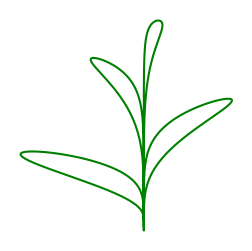

In [146]:
plt.figure(figsize=(3,3))
n = chapter_number
maxt=(2*(n-1)+3)*np.pi/2
t = np.linspace(np.pi/2, maxt, 1000)
tt= 1.0/(t+0.01)
x = (maxt-t)*np.cos(t)**3
y = t*np.sqrt(np.abs(np.cos(t))) + np.sin(0.3*t)*np.cos(2*t)
plt.plot(x, y, c="green")
plt.axis('off');

In [147]:
end = time.time()
print(f'Notebook {chapter_number} run in {int(end - start):d} seconds')

Notebook 4 run in 58 seconds
